# Introduction

- In this EDA (Exploratory Data Analysis) project, we will analyze the titanic dataset to understand factors effecting the survival rate.
- We will be using the titanic dataset from [Kaggle](https://www.kaggle.com/competitions/titanic/data).

# Data Preparation

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels

In [3]:
# Load the dataset

dataset_path = "../data/train.csv"
df = pd.read_csv(dataset_path)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

First of all, let's rename some columns to make them explaining.

In [9]:
# Renaming columns

# I will respect the camel case when renaming
df = df.rename(columns={
    "Pclass": "TicketClass", # 1 = 1st (upper), 2 = 2nd (middle), 3 = 3rd (lower)
    "SibSp": "SiblingsSpouses",
    "Parch": "ParentsChildren"
})

In [10]:
df.head()

,PassengerId,Survived,TicketClass,Name,Sex,Age,SiblingsSpouses,ParentsChildren,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now let's work with some null values.

In [11]:
df.isna().sum()

PassengerId          0
Survived             0
TicketClass          0
Name                 0
Sex                  0
Age                177
SiblingsSpouses      0
ParentsChildren      0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
dtype: int64

We'll:
- Delete entries with null ages because it may be a crucial factor for survival rate, so we don't want to create misleading data
- Set "unknown" for null cabins since there are a lot of them and there is no easy way to generate filler data
- Delet 2 unknown embraktions

In [12]:
# Age
df = df.dropna(subset=["Age"])

# Cabin
df["Cabin"] = df["Cabin"].fillna("Unknown")

# Embarked
df = df.dropna(subset=["Embarked"])

In [13]:
df.isna().sum()

PassengerId        0
Survived           0
TicketClass        0
Name               0
Sex                0
Age                0
SiblingsSpouses    0
ParentsChildren    0
Ticket             0
Fare               0
Cabin              0
Embarked           0
dtype: int64

Now let's rename some values so they make more sense.

In [14]:
df.head()

,PassengerId,Survived,TicketClass,Name,Sex,Age,SiblingsSpouses,ParentsChildren,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [15]:
df.dtypes

PassengerId          int64
Survived             int64
TicketClass          int64
Name                object
Sex                 object
Age                float64
SiblingsSpouses      int64
ParentsChildren      int64
Ticket              object
Fare               float64
Cabin               object
Embarked            object
dtype: object

In [16]:
# Find the number of unique entries with dtype object (looking for numbers is unnecessary)
df[df.select_dtypes(include="object").columns].nunique()

Name        712
Sex           2
Ticket      541
Cabin       134
Embarked      3
dtype: int64

- Each name is unique as expected.
- There are 2 sexes (male, female) in the dataset, which doesn't need further adjustment. 
- It seems like there may be some duplicates of Ticket and Cabin values, needs inspection.
- There are 4 embark locations (S, Q, C, Unknown) in this dataset, renaming these would be easier to read.

In [17]:
# Ticket duplicates
df.duplicated(subset="Ticket").sum()

171

In [18]:
# Cabin duplicates
df.duplicated(subset="Cabin").sum()

578

- This means that some people share the same ticked and/or cabin.
- This may have a minor impact on survival rate, since we can assume people on the same cabin may have had a similar fate.

In [19]:
df["Cabin"].unique(), df["Cabin"].nunique()

(array(['Unknown', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
        'C23 C25 C27', 'D33', 'B30', 'C83', 'F33', 'F G73', 'E31', 'A5',
        'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'D47', 'B86', 'F2',
        'C2', 'B19', 'A7', 'C49', 'F4', 'B4', 'B80', 'A31', 'D36', 'D15',
        'C93', 'C78', 'D35', 'C87', 'B77', 'E67', 'B94', 'C125', 'C99',
        'C118', 'D7', 'B49', 'D', 'C22 C26', 'C65', 'E36', 'C54',
        'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
        'T', 'E33', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'C52',
        'E44', 'A34', 'C104', 'C111', 'C92', 'E38', 'E12', 'E63', 'B37',
        'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'B38', 'B39', 'B22',
        'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
        'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'B71',
        'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',
        'C90', 'C126', 'C45', 'E8', 'B101', 'C46', 'D30', 'E121', 'D1

Also it seems like some passengers have multiple cabins (like 'B51 B53 B55'). Let's normalize them.

In [20]:
# Split the rows containing multiple cabins and select the first one
df['Cabin'] = df['Cabin'].apply(lambda x: x.split()[0] if x != 'Unknown' else 'Unknown')

In [21]:
df["Cabin"].unique(), df["Cabin"].nunique()

(array(['Unknown', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23',
        'D33', 'B30', 'C83', 'F33', 'F', 'E31', 'A5', 'D10', 'D26', 'C110',
        'B58', 'E101', 'D47', 'B86', 'F2', 'C2', 'B19', 'A7', 'C49', 'F4',
        'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87',
        'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'B49', 'D',
        'C22', 'C65', 'E36', 'C54', 'B57', 'C7', 'E34', 'C32', 'B18',
        'C124', 'C91', 'E40', 'T', 'E33', 'D37', 'B35', 'E50', 'C82',
        'B96', 'E10', 'C52', 'E44', 'A34', 'C104', 'C111', 'C92', 'E38',
        'E12', 'E63', 'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73',
        'B38', 'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10',
        'E68', 'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26',
        'D48', 'E58', 'B71', 'B51', 'D49', 'B5', 'B20', 'C62', 'E24',
        'C90', 'C126', 'C45', 'E8', 'B101', 'C46', 'D30', 'E121', 'D11',
        'E77', 'B3', 'D6', 'B82', 'D17', 'A36', 'B69', 'E49', 'D2

Let's continue with renaming embark locations.

In [22]:
# Renaming values

embark_mapping = {
    'C': 'Cherbourg',
    'Q': 'Queenstown',
    'S': 'Southampton'
}

df['Embarked'] = df['Embarked'].map(embark_mapping)

In [23]:
df.head()

,PassengerId,Survived,TicketClass,Name,Sex,Age,SiblingsSpouses,ParentsChildren,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,Southampton


Seems like the dataset is in a better shape. Let's continue with analyzing the data. We can make further adjustments if required.

# Interpretations

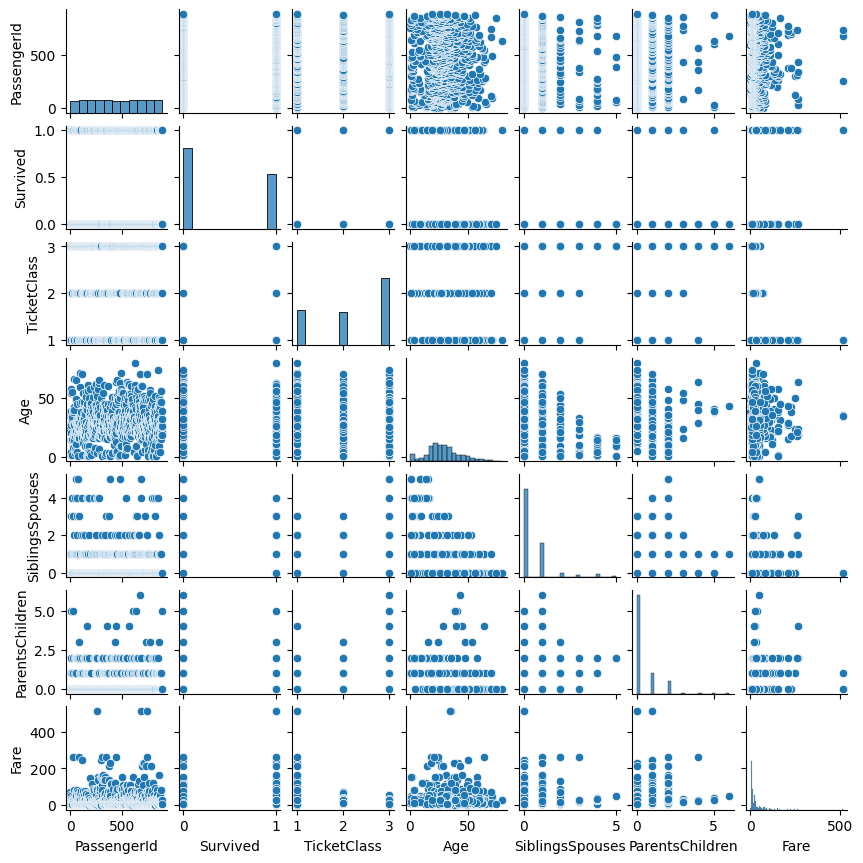

In [24]:
# Full comparison

sns.pairplot(data=df, height=1.25)

plt.show()

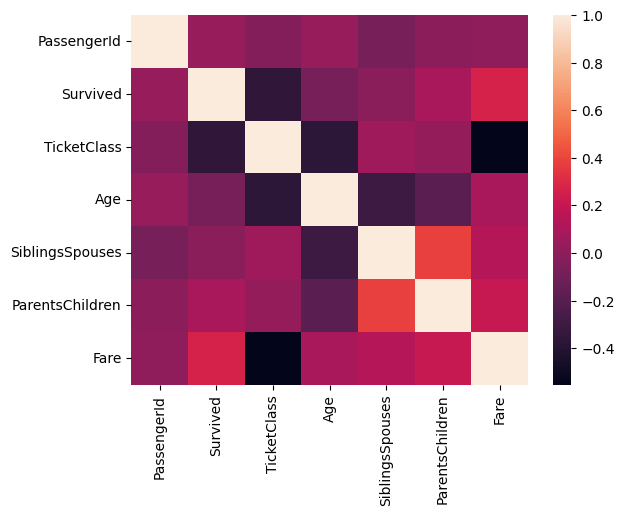

In [46]:
sns.heatmap(df.corr(numeric_only=True))
plt.show()

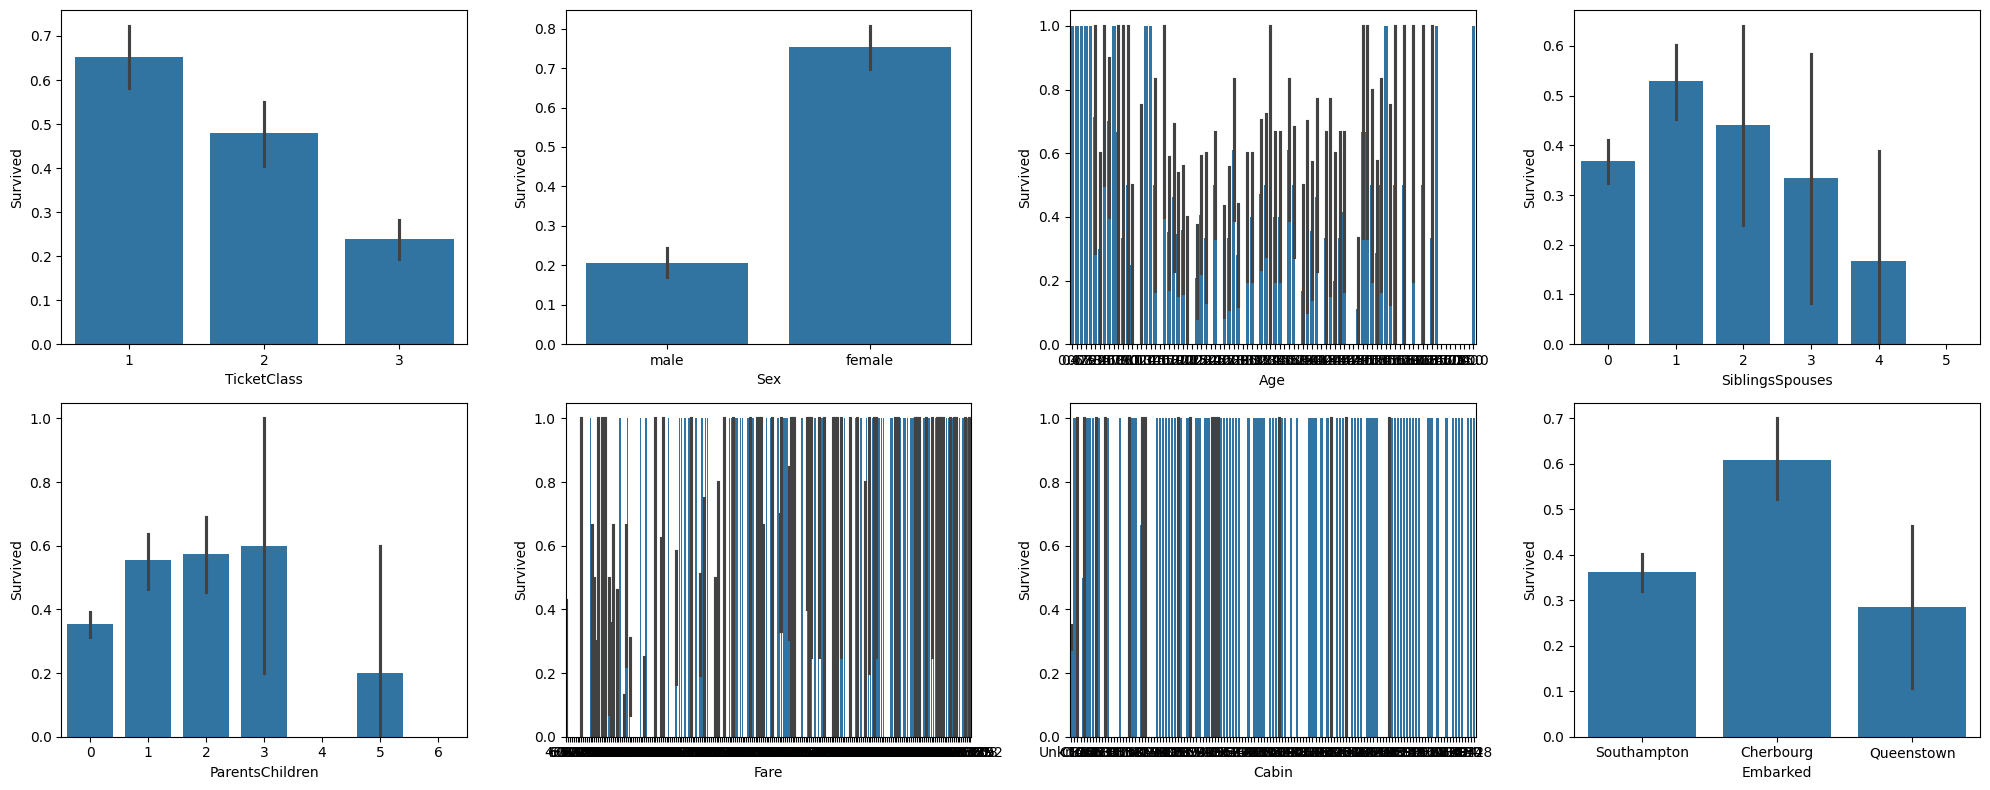

In [26]:
# Effects on survival rate

cols = ["TicketClass", "Sex", "Age", "SiblingsSpouses", "ParentsChildren", "Fare", "Cabin", "Embarked"] # PassengerId, Name and Ticket is unnecessary

fig, axes = plt.subplots(2, 4, figsize=(20,8))
axes = axes.reshape(-1)

for i in range(len(cols)):
    sns.barplot(data=df, 
                    x=cols[i], 
                    y="Survived", 
                    ax=axes[i])

plt.tight_layout()
plt.show()

## Univariate Analysis

## Ticket Class

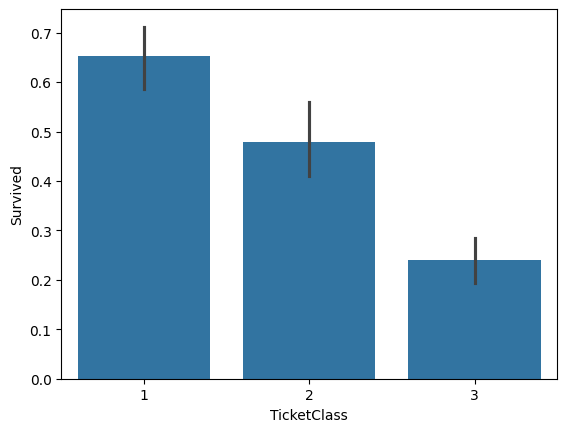

In [27]:
# Ticket Class

sns.barplot(data=df,
            x="TicketClass",
            y="Survived",
            )

plt.show()

Conclusion: Lower ticket class number means a higher class (1st = Upper, 2nd = Middle, 3rd = Lower). Thus, passangers with upper class tickets have a higher survival chance.

## Gender

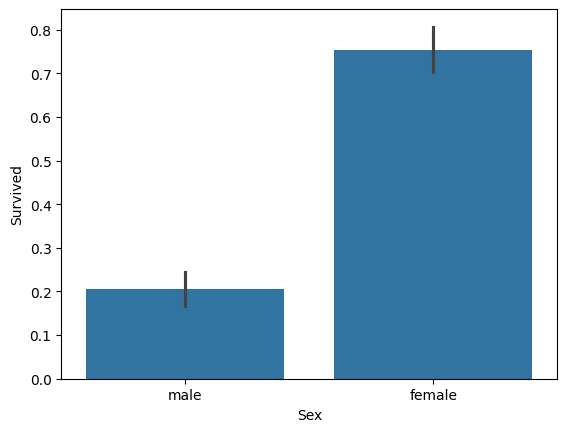

In [28]:
## Sex

sns.barplot(data=df,
            x="Sex",
            y="Survived",
            )

plt.show()

Conclusion: Female passangers have a significantly higher survival chance. This makes sense because women and children had priority to evacuate when Titanic sunk.

## Age

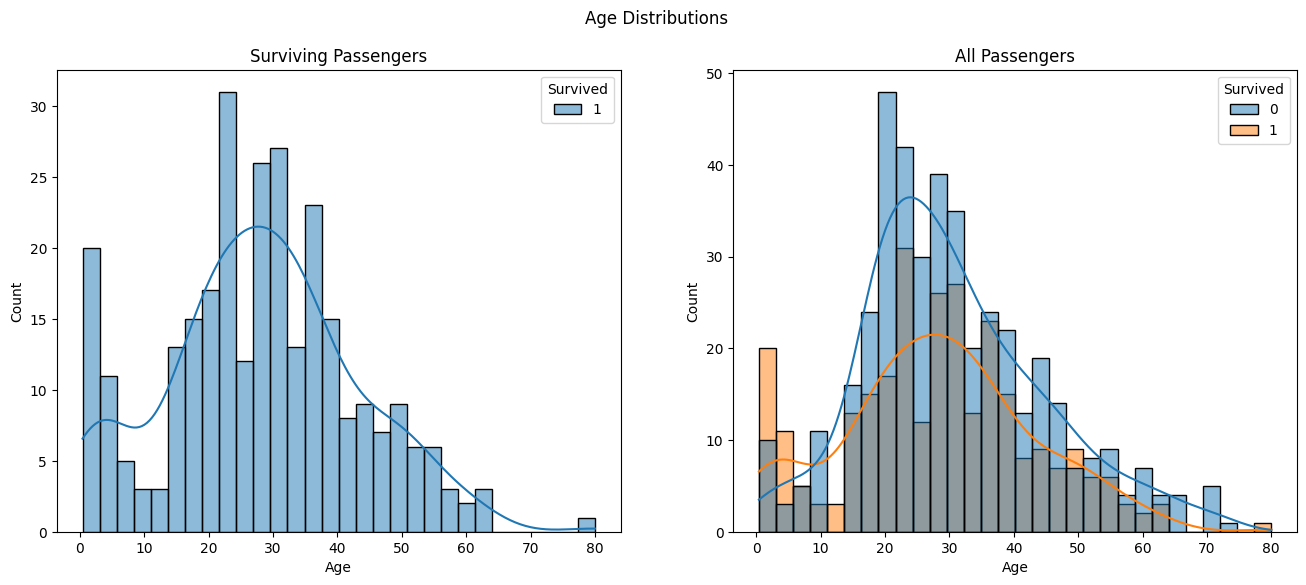

In [29]:
# Age

fig, axes = plt.subplots(1, 2, figsize=(16,6))

survivors = df[df["Survived"] == 1]
sns.histplot(data=survivors, 
             x="Age", 
             hue="Survived",
             bins=30, 
             kde=True, 
             ax=axes[0])
axes[0].set_title("Surviving Passengers")

sns.histplot(data=df, 
             x="Age", 
             hue="Survived", 
             bins=30, 
             kde=True, 
             ax=axes[1])
axes[1].set_title("All Passengers")

plt.suptitle("Age Distributions")
plt.show()

This observation doesn't give us enough information to infer the corelation between age and survival. People around the age of 30 has a higher survival chance, but at the same time theu have a higher death chance. We need a better observation.

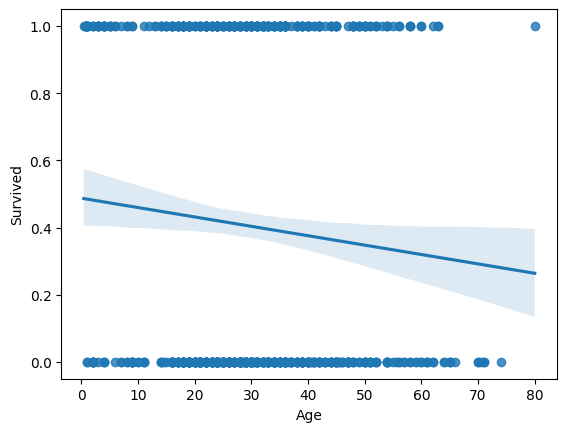

In [30]:
sns.regplot(data=df, 
            x="Age", 
            y="Survived")

plt.show()

Conclusion: Seems like age doesn't have a major impact on survival rate, although younger people has a slightly higher chance to survive.

## Siblings/Spouses and Parents/Children

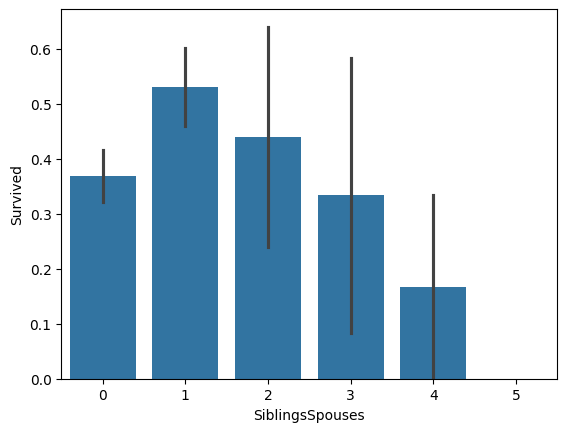

In [31]:
# Siblings & Spouses

sns.barplot(data=df,
            x="SiblingsSpouses",
            y="Survived")

plt.show()

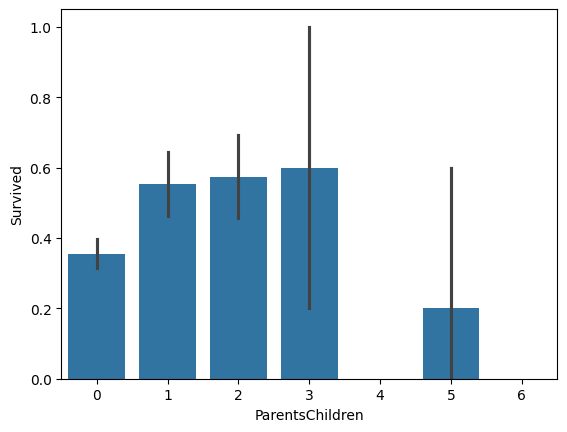

In [32]:
# Parents & Children

sns.barplot(data=df,
            x="ParentsChildren",
            y="Survived")

plt.show()

Conclusions:
- SiblingsSpouses and ParentsChildren has quite different effects on survival chance. This means that simply comining them into a "Relatives" column would mean a loss in information.
- Passengers with lower siblings/spouses have a higher survival chance.
- Passengers with lower/middle amount of parents/children have a gihher survival chance.
- Both of these features seems to have minimal effect on survival chance.

## Fare

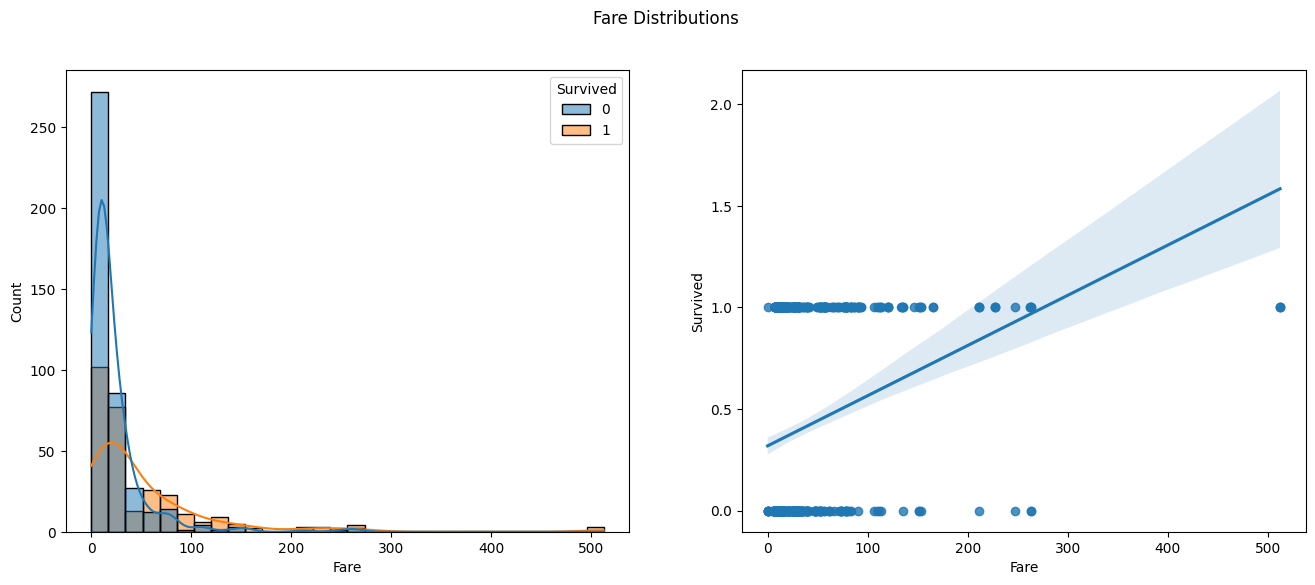

In [33]:
# Fare

fig, axes = plt.subplots(1, 2, figsize=(16,6))

sns.histplot(data=df, 
             x="Fare", 
             hue="Survived",
             bins=30, 
             kde=True, 
             ax=axes[0])

sns.regplot(data=df, 
            x="Fare", 
            y="Survived",
            ax=axes[1])


plt.suptitle("Fare Distributions")
plt.show()

Conclusion: A higher ticket fare results in higher survival chance. This matches with the previous observation of ticket classes.

## Embark Location

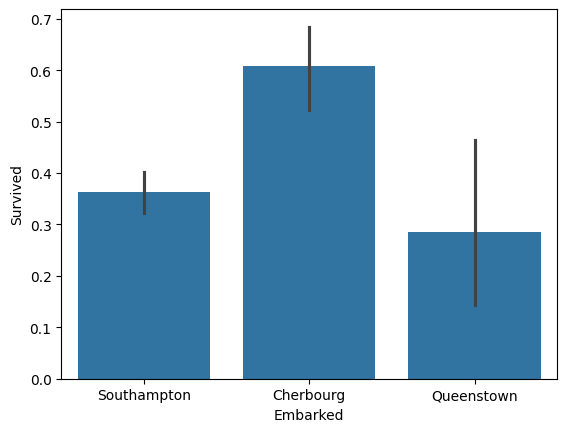

In [34]:
# Embarked

sns.barplot(data=df,
            x="Embarked",
            y="Survived")

plt.show()

Conclusion: Embarktions from Cherbourg seems to have a significantly higher chance of survival than other two locations. This may be correlated to ticket class and fare, needs further inspection.

## Cabin

<Axes: xlabel='CabinNumber', ylabel='Deck'>

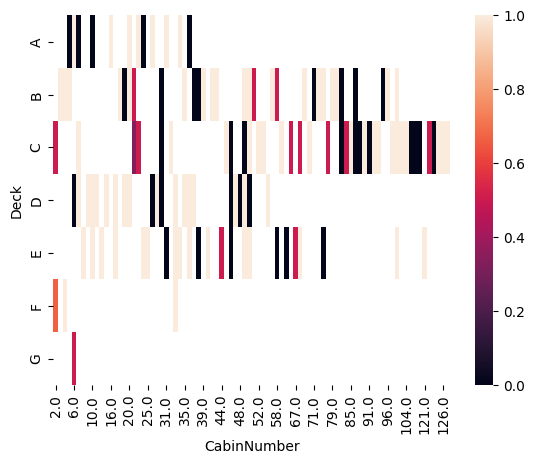

In [35]:
# Cabin

df_cabin = df.copy()

df_cabin["Deck"] = df_cabin["Cabin"].str.extract(r"([A-Z])") # Letter
df_cabin["CabinNumber"] = df_cabin["Cabin"].str.extract(r"(\d+)").astype(float) # Number

df_cabin_clean = df_cabin.dropna(subset=['Deck', 'CabinNumber']) # Filter out NA values just in case

cabin_survival = df_cabin_clean.groupby(["Deck", "CabinNumber"])["Survived"].mean().reset_index()

heatmap_data = cabin_survival.pivot(index="Deck", columns="CabinNumber", values="Survived")

heatmap_data = heatmap_data.sort_index()  # Sort decks alphabetically
heatmap_data = heatmap_data.sort_index(axis=1)  # Sort cabin numbers numerically

sns.heatmap(heatmap_data)

Conclusion: There is no correlation direct correlation between cabin and survival chance. Seems like cabins with lower numbers have a higher chance of survival, this maybe caused by the price and respective locations on the ship of these cabins, but this need verification.

# Bivariate and Multivariate Analysis

In [36]:
df.head()

,PassengerId,Survived,TicketClass,Name,Sex,Age,SiblingsSpouses,ParentsChildren,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,Southampton


## Embark Location and Ticket Fare

<Axes: xlabel='Fare', ylabel='Count'>

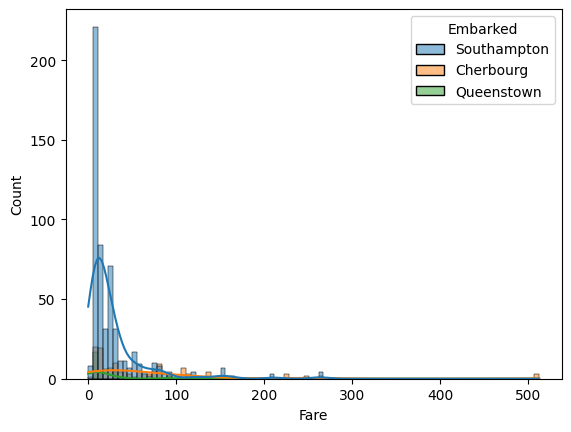

In [37]:
sns.histplot(data=df,
             x="Fare",
             hue="Embarked",
             kde=True)

In [38]:
# Mean price of embarktion locations

df.groupby("Embarked")["Fare"].mean()

Embarked
Cherbourg      68.296767
Queenstown     18.265775
Southampton    27.476284
Name: Fare, dtype: float64

Conclusion: Embraktions from Southampton and Queenstown have a lower fare. This verifies the prediction that Cherbourg embarktions have a higher survival chance because of the price.

## Relatives and Survival Chance


<Axes: xlabel='ParentsChildren', ylabel='SiblingsSpouses'>

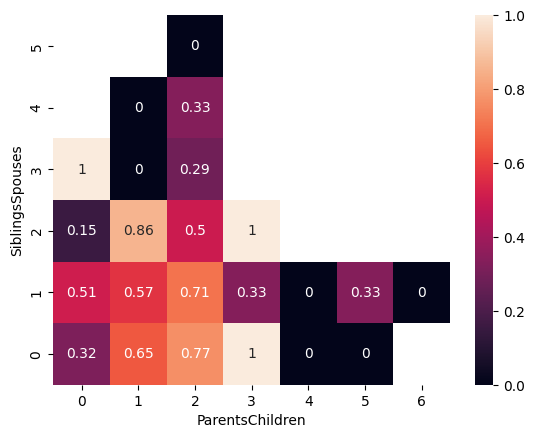

In [39]:
pivot = df.pivot_table(values="Survived", 
                       index="SiblingsSpouses", 
                       columns="ParentsChildren", 
                       aggfunc="mean")
pivot = pivot.sort_index(ascending=False)

sns.heatmap(pivot, 
            annot=True)

Conclusion: Number of relatives isn't a major factor for survival chance, but having a high number of relatives seems to lower the survival chance. But also, it's hard to make a correct statement for high relative counts because of insufficent data.

## Ticket and Fare

In [40]:
df_cabin = df.copy()

df_cabin["Deck"] = df_cabin["Cabin"].str.extract(r"([A-Z])") # Letter
df_cabin["CabinNumber"] = df_cabin["Cabin"].str.extract(r"(\d+)").astype(float) # Number

df_cabin_clean = df_cabin.dropna(subset=['Deck', 'CabinNumber']) # Filter out NA values just in case

df_cabin = df_cabin.sort_values("Deck")

### Ticket Number, Letter and Fare

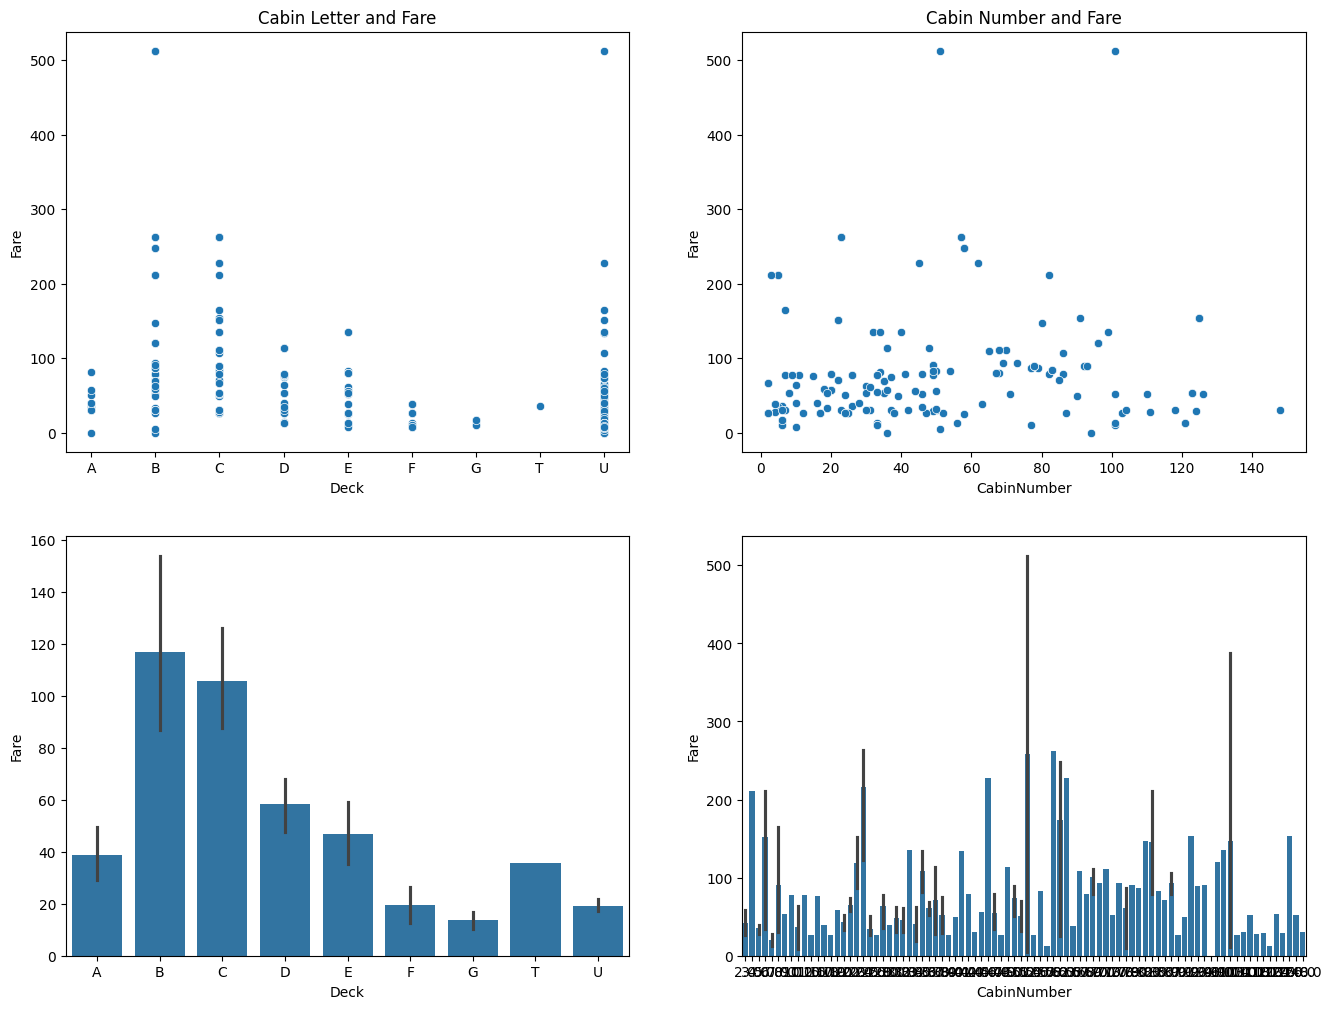

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.reshape(-1)

sns.scatterplot(data=df_cabin,
                x="Deck",
                y="Fare",
                ax=axes[0])
axes[0].set_title("Cabin Letter and Fare")

sns.scatterplot(data=df_cabin,
                x="CabinNumber",
                y="Fare",
                ax=axes[1])
axes[1].set_title("Cabin Number and Fare")

sns.barplot(data=df_cabin,
                x="Deck",
                y="Fare",
                ax=axes[2])

sns.barplot(data=df_cabin,
                x="CabinNumber",
                y="Fare",
                ax=axes[3])

plt.show()

Conclusions:
- Cabins at deck B and C have a higher fare.
- Cabin number and fare are unrelated

Let's look at the correlation between cabin letter and survival chance.

<Axes: xlabel='Deck', ylabel='Survived'>

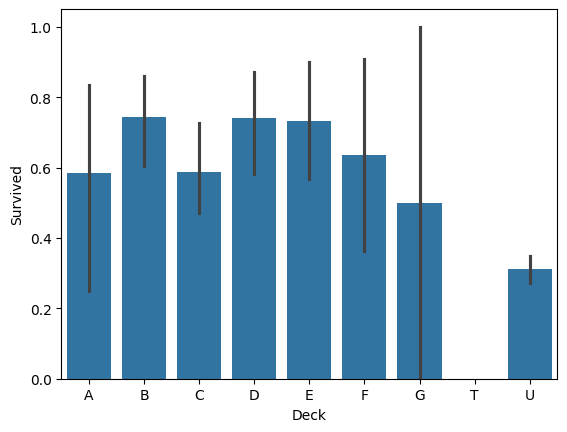

In [42]:
sns.barplot(data=df_cabin,
            x="Deck",
            y="Survived")

Conclusion: Passengers on decks F, G, T and U have the lowes survival chances, and these decks have the lowest fares. But, decks B and C does not have a remarkably higher survival chance than decks A, D and E despite being much more expensive.

# Export Adjusted Dataset

In [ ]:
# Save the final form  of df
df.to_csv("../data/train_adjusted.csv")

# Final Conclusions

Key Insights:
- Women have a significantly higher survival chance then men.
- Younger passengers have a slightly higher chance of survival.
- Richer passengers (those with higher class tickets and higher fares) have a higher chance to survive.

Other Findngs:
- Tickets froum Cherbourg are more expensive than Queenstown and Southampton
- Tickets for decks A and B are more expensive than others.
- Lower number of relatives (siblings, spouses, parents, children) result in s slightly higher chance of survival (although this effect is minimal)

Next Steps:
- Train a machine learning model to predict chance of survival!